# **Lead Scoring Assignment**
### By:- 
 - Sidharth Kumar Singh
 - Shraddha Choubey

# **Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Changing Pandas option for more visibility**

In [2]:
pd.set_option('display.max_columns', 100)

### **Fetch data**

In [3]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### **We can observe some coloumns have NaN values**

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### **By describe method we can see some columns have outliers as well**

In [7]:
lead_df[lead_df.duplicated(keep=False)].shape

(0, 37)

### **No values are duplicate**

### Following columns have a value called select. Convert those values as NaN since the customer has not selected any options for these columns while entering the data.
- Specialization
- How did you hear about X Education
- Lead Profile
- City

### Converting 'Select' values to NaN.

In [8]:
lead_df['Specialization'] = lead_df['Specialization'].replace('Select', np.nan)
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace('Select', np.nan)
lead_df['Lead Profile'] = lead_df['Lead Profile'].replace('Select', np.nan)
lead_df['City'] = lead_df['City'].replace('Select', np.nan)

### **Check for percentage of NaN values in each column and sorted in descending order**

In [9]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### **Let us drop the following columns that have more than 30% null values**

- Specialization
- How did you hear about X Education
- Tags
- Lead Quality
- Lead Profile
- City
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

In [10]:
lead_df = lead_df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

### **Check for percentage of NaN values in each column after dropping columns having more than 30% NaN values**

In [11]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### **Let's analyis and do data imputation**

In [12]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### **Since Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and since the column also has around 29% as missing values, we shall go ahead and drop the column.**

In [13]:
lead_df = lead_df.drop(['What matters most to you in choosing a course'], axis=1)

In [14]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### **Since no information has been provided Current Occupation, we can add a new category called NA and set that as value for the NaN columns.**

In [15]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'NA')

In [16]:
lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Uganda                     2
Bangladesh                 2
Philippines                2
Belgium                    2
Asia/Pacific Region        2
Ghana                      2
China                      2
Italy                      2
Switzerland                1
Indonesia                  1
Kenya                      1
Vietnam                    1
Russia                     1
Sri Lanka                  1
Liberia       

In [17]:
round(100*len(lead_df[lead_df['Country'] == 'India'])/len(lead_df['Country']),2)

70.26

70.26 + 26.63 = 96.89 

### **Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, we shall go ahead and drop the column.**

In [18]:
lead_df = lead_df.drop(['Country'], axis=1)

In [19]:
lead_df['TotalVisits'].median()

3.0

### **We will impute the null values in TotalVisits by the median value which is 3.0**

In [20]:
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan, lead_df['TotalVisits'].median())

In [21]:
lead_df['Page Views Per Visit'].median()

2.0

### **We will impute the NaN values in 'Page Views Per Visit' by the median value which is 2.0**

In [22]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan, lead_df['Page Views Per Visit'].median())

### **Since we do not have any information of what the last activity of the customer would have been, we can add a new category called NA for the NaN values**

In [23]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'NA')

- From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case.
- Also since "Google" has the major chunk of data, we can impute the null values with Google

In [24]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [25]:
lead_df.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

### **`We have successfully imputed the data`**

## **Let's get the details of all the columns.**

In [26]:
for column in lead_df:
    print(lead_df[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Ad

### **Since the following columns have only one value "No" in all the rows, we can eliminate the columns :**

- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [27]:
lead_df = lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [28]:
lead_df.shape

(9240, 20)

# **Outlier Detection**

In [29]:
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


### **Check for outliers**

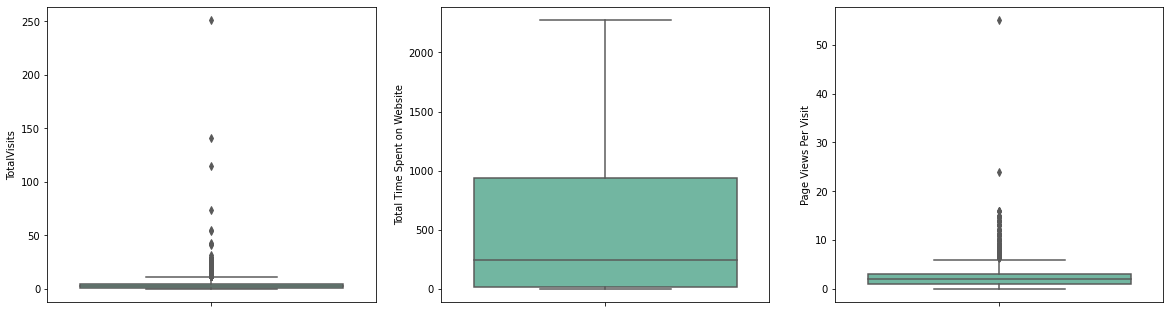

In [30]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead_df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead_df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead_df)
plt.show()

### **Removing values beyond 99% for Total Visits**

In [31]:
nintynine_quartile_total_visits = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] < nintynine_quartile_total_visits]

In [32]:
nintynine_quartile_page_visits = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] < nintynine_quartile_page_visits]

In [33]:
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


### **Determine the percentage of data retained**

In [34]:
num_data = round(100*(len(lead_df)/9240),2)
print(num_data)

97.72


# **Data Analysis**

### **Let us try and understand the data now based on each columns effect on the conversion rates**

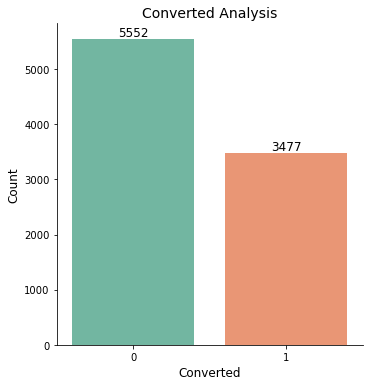

In [35]:
plot = sns.catplot(x="Converted", kind="count", data=lead_df, palette="Set2")

plt.title('Converted Analysis', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

### **Let's create a method for categorial analysis**

In [36]:
def categorical_analysis(x,hue,aspect,title,xlabel,ylabel,rot=0):
    plot = sns.catplot(x=x, hue = hue, kind="count", data=lead_df, palette="Set2", aspect = aspect);
    plt.title(title, fontsize = 14)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.xticks(rotation=rot)
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
        
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
        
    plt.show()

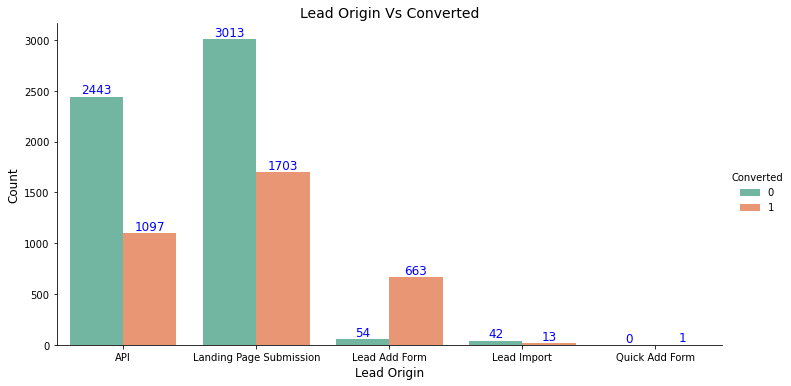

In [37]:
categorical_analysis('Lead Origin','Converted',2.0,'Lead Origin Vs Converted','Lead Origin','Count')

**From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission
Also there was only one request from quick add form which got converted.**

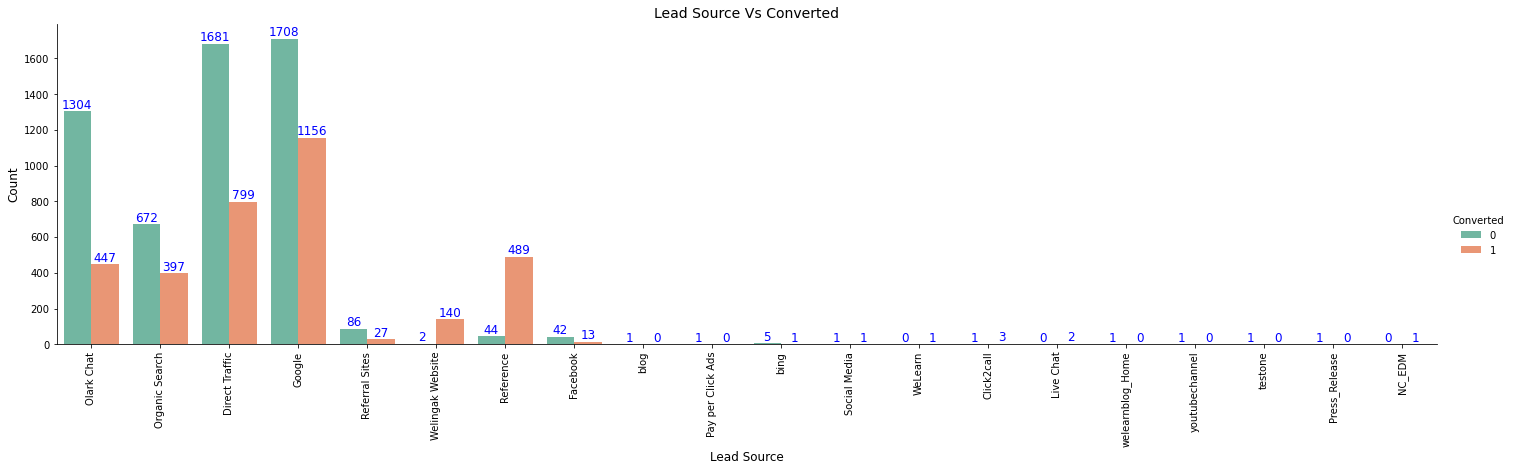

In [38]:
categorical_analysis('Lead Source','Converted',4.0,'Lead Source Vs Converted','Lead Source','Count',90)

**From the above graph, it can be seen that major conversion in the lead source is from google.**

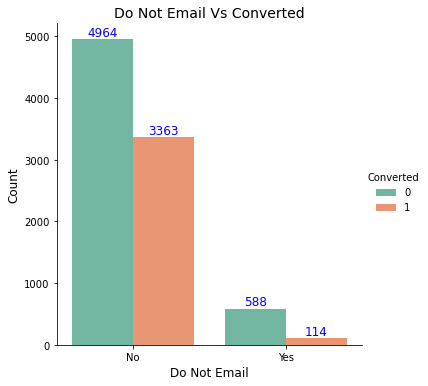

In [39]:
categorical_analysis('Do Not Email','Converted',1.0,'Do Not Email Vs Converted','Do Not Email','Count')

**Based on the above graph, major conversion has happend from the emails that have been sent**

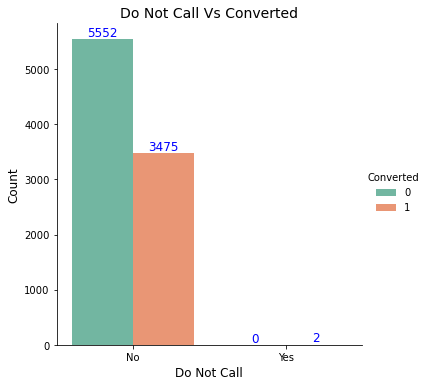

In [40]:
categorical_analysis('Do Not Call','Converted',1.0,'Do Not Call Vs Converted','Do Not Call','Count')

**From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.**

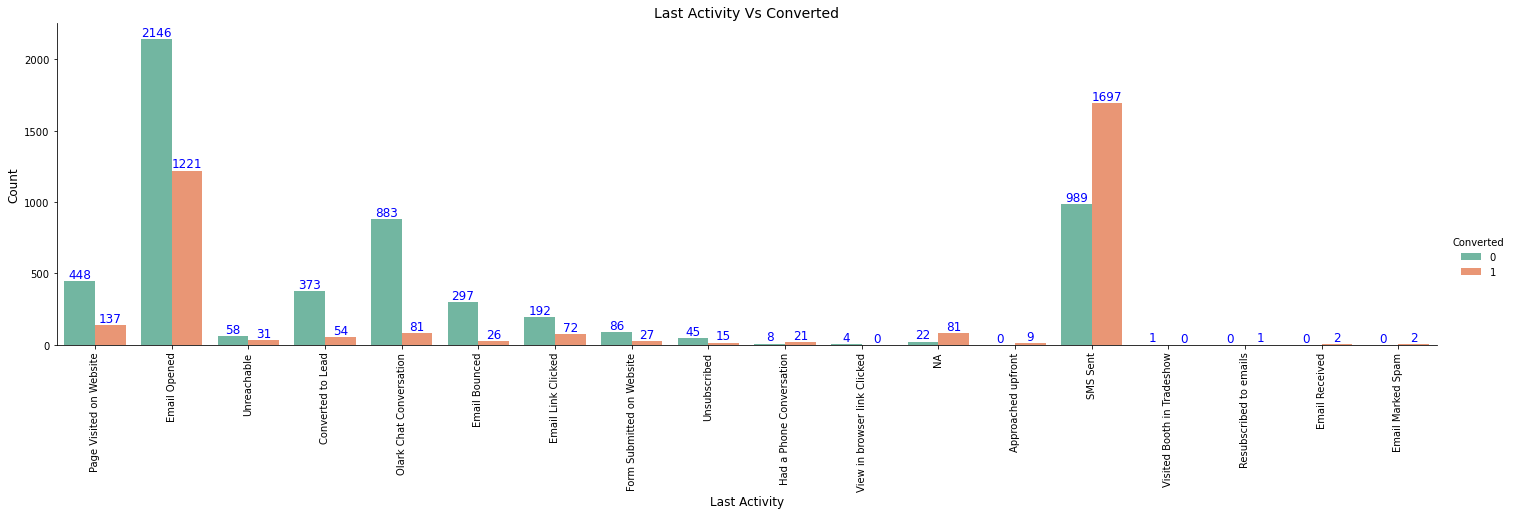

In [41]:
categorical_analysis('Last Activity','Converted',4.0,'Last Activity Vs Converted','Last Activity','Count',90)

**As per the above graph, last activity value of 'SMS Sent' had more conversion**

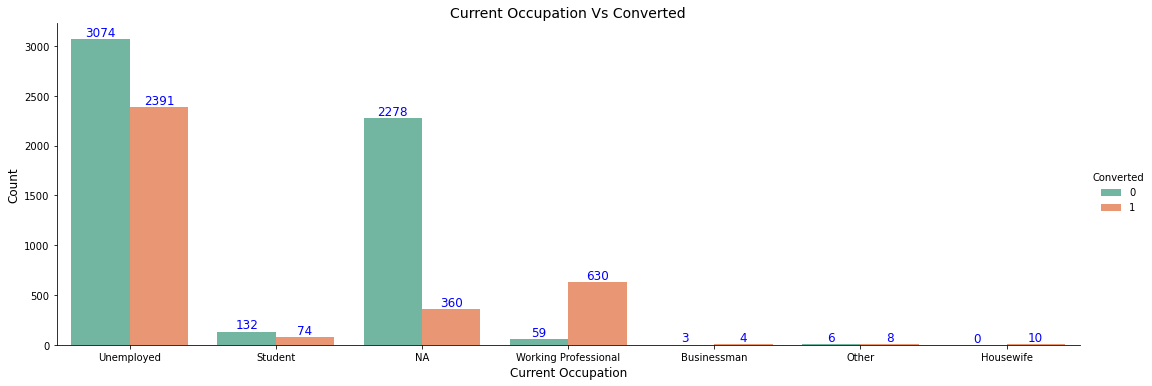

In [42]:
categorical_analysis('What is your current occupation','Converted',3.0,'Current Occupation Vs Converted','Current Occupation','Count')

**More conversion happend with people who are unemployed. It can also be noticed from the above data that**
 - Out of 7 business men, 4 got converted
 - Out 10 housewives, all 10 leads got converted.

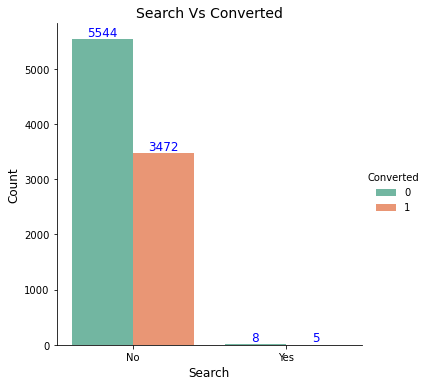

In [43]:
categorical_analysis('Search','Converted',1.0,'Search Vs Converted','Search','Count')

**Conversion rate is high on leads who are not through search**

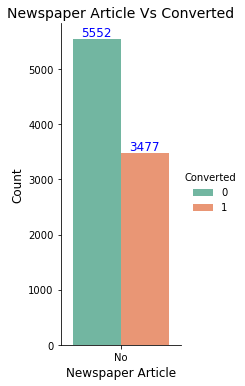

In [44]:
categorical_analysis('Newspaper Article','Converted',0.5,'Newspaper Article Vs Converted','Newspaper Article','Count')

**Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column**

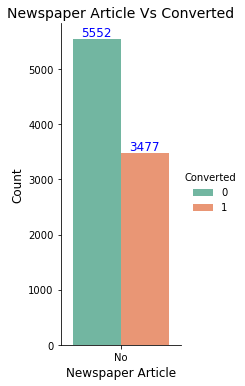

In [45]:
categorical_analysis('Newspaper Article','Converted',0.5,'Newspaper Article Vs Converted','Newspaper Article','Count')

In [46]:
lead_df = lead_df.drop(['Newspaper Article'], axis=1)

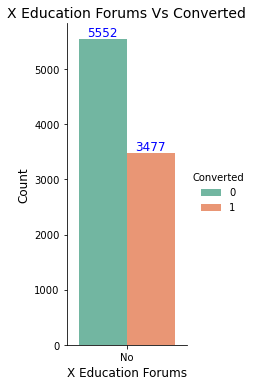

In [47]:
categorical_analysis('X Education Forums','Converted',0.5,'X Education Forums Vs Converted','X Education Forums','Count')

**Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column**

In [48]:
lead_df = lead_df.drop(['X Education Forums'], axis=1)

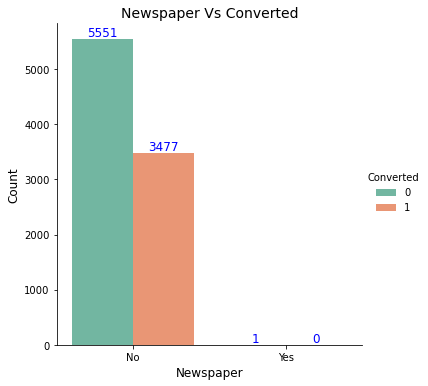

In [49]:
categorical_analysis('Newspaper','Converted',1.0,'Newspaper Vs Converted','Newspaper','Count')

**Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column**

In [50]:
lead_df = lead_df.drop(['Newspaper'], axis=1)

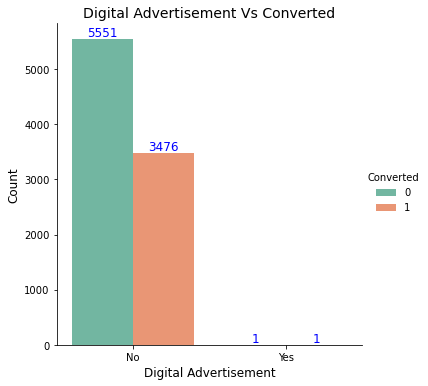

In [51]:
categorical_analysis('Digital Advertisement','Converted',1.0,'Digital Advertisement Vs Converted','Digital Advertisement','Count')

**It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted**

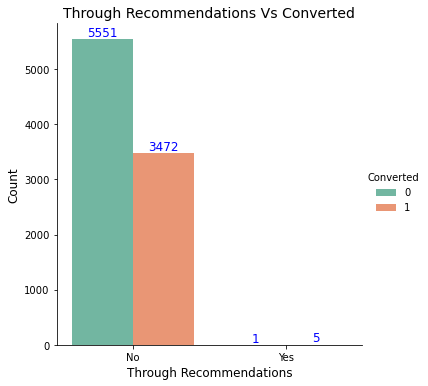

In [52]:
categorical_analysis('Through Recommendations','Converted',1.0,'Through Recommendations Vs Converted','Through Recommendations','Count')

**It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted**

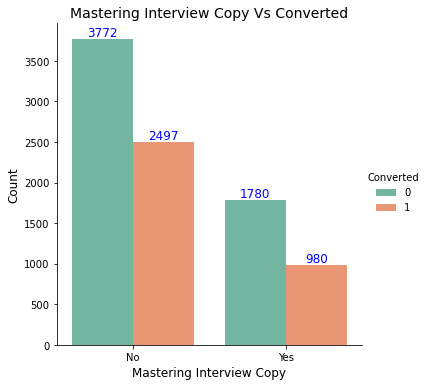

In [53]:
categorical_analysis('A free copy of Mastering The Interview','Converted',1.0,'Mastering Interview Copy Vs Converted','Mastering Interview Copy','Count')

**Conversion rate is high on leads who do not want a free copy of Mastering Interviews**

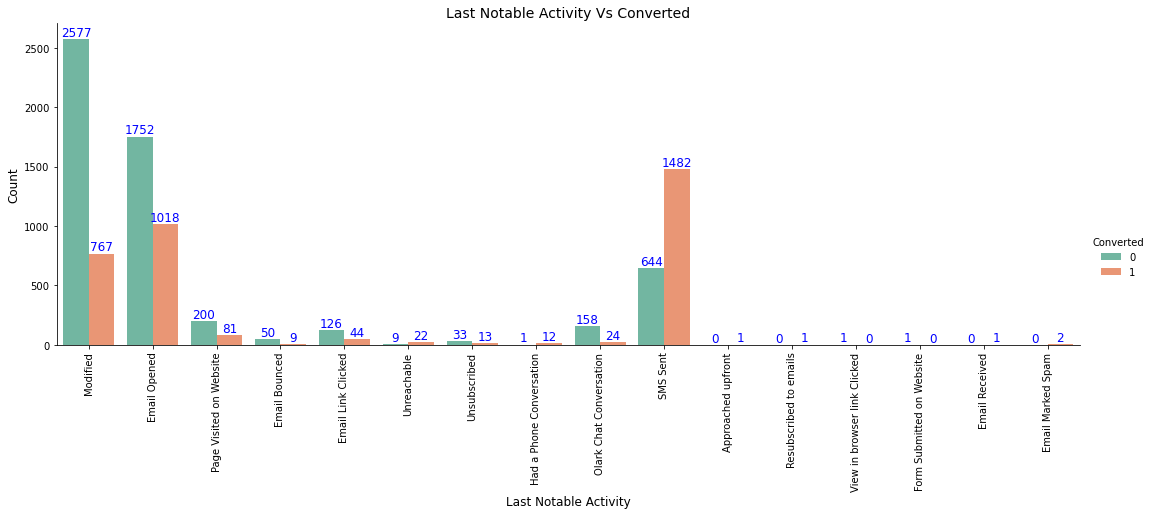

In [54]:
categorical_analysis('Last Notable Activity','Converted',3.0,'Last Notable Activity Vs Converted','Last Notable Activity','Count',90)

**It can be noticed that the conversion rate is high for "SMS Sent"**

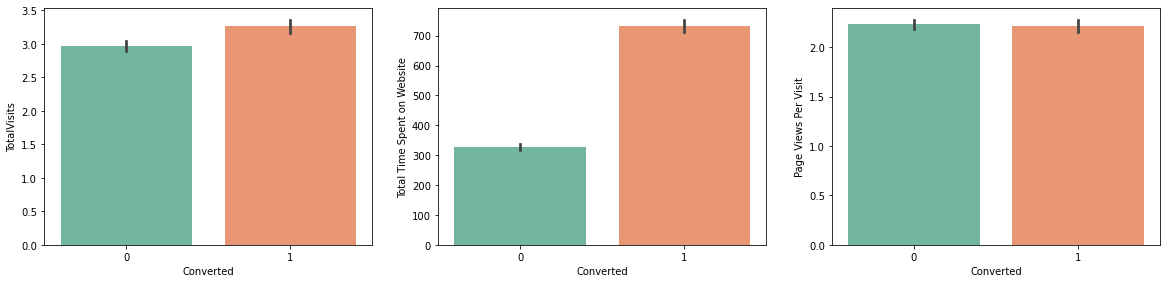

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead_df)
plt.show()

**The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit**

# **Create Dummies**

In [56]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[variablelist] = lead_df[variablelist].apply(binary_map)

In [57]:
# Lead Origin : 

d_lead_origin = pd.get_dummies(lead_df['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(lead_df['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(lead_df['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(lead_df['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(lead_df['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_last_notable_activity1], axis=1)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_NA,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_NA,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### **Remove following columns from the leadInfo**

 - Prospect ID
 - Lead Numbers
 - Lead Origin
 - Lead Source
 - Last Activity
 - What is your current occupation
 - Last Notable Activity

In [58]:
lead_df = lead_df.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [59]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

### **check for percentage of NaN values in each column**

In [60]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64

In [61]:
lead_df.shape

(9029, 71)

# **Test-Train Split**

In [62]:
from sklearn.model_selection import train_test_split

### **Splitting X and Y data**

In [63]:
X = lead_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_NA,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_NA,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [64]:
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### **Splitting the data into train and test**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# **Feature Scaling - MinMaxScaler**

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_NA,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_NA,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### **Checking the Conversion Rate percentage**

In [67]:
(sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100

38.50924797873519

# **Model Building**

In [68]:
import statsmodels.api as sm

### **Feature selection via statistics**

In [69]:
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Aug 2021   Deviance:                          nan
Time:                        00:48:09   Pearson chi2:                 6.72e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.454e+15    6.4e+07    5.4e+07      0.000    3.45e+15    3.45e+15
Do Not Email                                     -7.011e+14   4.48e+06  -1.57e+08      0.000   -7.01e+14   -7.01e+14
Do Not Call                                       3.859e+15   4.76e+07   8.11e+07      0.000    3.86e+15    3.86e+15
TotalVisits                                       1.296e+15   7.66e+06   1.69e+08      0.000     1.3e+15     1.3e+15
Total Time Spent on Website                       -2.64e+14   4.01e+06  -6.58e+07      0.000   -2.64e+14   -2.64e+14
Page Views Per Visit                             -2.522e+14   6.53e+06  -3.86e+07      0.000   -2.52e+14   -2.52e+14
Search                                           -5.805e+14   2.44e+07  -2.38e+07      0.000    -5.8e+14    -5.8e+14
Digital Advertisement                             5.673e+14   4.76e+07   1.19e+07      0.000    5.67e+14    5.67e+14
Through Recommendations                          -4.994e+14    4.2e+07  -1.19e+07      0.000   -4.99e+14   -4.99e+14
A free copy of Mastering The Interview            5.643e+13   2.69e+06    2.1e+07      0.000    5.64e+13    5.64e+13
LeadOrigin_API                                   -5.695e+15   6.74e+07  -8.45e+07      0.000    -5.7e+15    -5.7e+15
LeadOrigin_Landing Page Submission               -5.849e+15   6.74e+07  -8.68e+07      0.000   -5.85e+15   -5.85e+15
LeadOrigin_Lead Add Form                         -5.323e+15   6.86e+07  -7.76e+07      0.000   -5.32e+15   -5.32e+15
LeadOrigin_Lead Import                           -8.363e+15   8.27e+07  -1.01e+08      0.000   -8.36e+15   -8.36e+15
LeadSource_Click2call                             5.042e+15   4.69e+07   1.08e+08      0.000    5.04e+15    5.04e+15
LeadSource_Direct Traffic                         7.031e+14   1.17e+07   6.02e+07      0.000    7.03e+14    7.03e+14
LeadSource_Facebook                               1.289e+15   4.62e+07   2.79e+07      0.000    1.29e+15    1.29e+15
LeadSource_Google                                 7.803e+14   1.15e+07   6.78e+07      0.000     7.8e+14     7.8e+14
LeadSource_Live Chat                               4.02e+15   4.67e+07    8.6e+07      0.000    4.02e+15    4.02e+15
LeadSource_Olark Chat                             1.712e+15   1.18e+07   1.45e+08      0.000    1.71e+15    1.71e+15
LeadSource_Organic Search                         6.888e+14   1.18e+07   5.85e+07      0.000    6.89e+14    6.89e+14
LeadSource_Pay per Click Ads                       -12.0992   1.92e-07  -6.29e+07      0.000     -12.099     -12.099
LeadSource_Press_Release                           -12.5875    2.8e-07  -4.49e+07      0.000     -12.588     -12.588
LeadSource_Reference                     

In [70]:
X_train['LastNotableActivity_View in browser link Clicked']

2240    0
113     0
4132    0
5573    0
1109    0
       ..
5854    0
5292    0
5496    0
885     0
7430    0
Name: LastNotableActivity_View in browser link Clicked, Length: 6320, dtype: uint8

Feature Selection Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
X_train.shape

(6320, 70)

# **Feature Selection Using RFE** 

In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 25)            
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 40),
 ('Through Recommendations', False, 25),
 ('A free copy of Mastering The Interview', False, 32),
 ('LeadOrigin_API', False, 4),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 15),
 ('LeadSource_Click2call', False, 24),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 5),
 ('LeadSource_Google', False, 22),
 ('LeadSource_Live Chat', False, 33),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 21),
 ('LeadSource_Pay per Click Ads', False, 41),
 ('LeadSource_Press_Release', False, 45),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 20),
 ('LeadSource_Social Media', False, 36),
 ('LeadSource_WeLearn', False, 42),
 ('

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Bounced', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_NA',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

## **Created method for getting model summary**

In [76]:
def get_model_summary():
    X_train_sm = sm.add_constant(X_train[col])
    model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model.fit()
    print(res.summary())
    return res,X_train_sm


### **Start elimiating feature p value greater then 5%**

### **Iteration 1**

In [77]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.1
Date:                Mon, 09 Aug 2021   Deviance:                       4980.2
Time:                        00:48:15   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [78]:
col = col.drop('LastActivity_Approached upfront',1)

### **Iteration 2**

In [79]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.3
Date:                Mon, 09 Aug 2021   Deviance:                       4990.7
Time:                        00:48:16   Pearson chi2:                 6.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [80]:
col = col.drop('CurrentOccupation_Housewife',1)

### **Iteration 3**

In [81]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.9
Date:                Mon, 09 Aug 2021   Deviance:                       5003.8
Time:                        00:48:16   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [82]:
col = col.drop('LeadSource_Reference',1)

### **Iteration 4**

In [83]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.4
Date:                Mon, 09 Aug 2021   Deviance:                       5004.9
Time:                        00:48:16   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [84]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

### **Iteration 5**

In [85]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.1
Date:                Mon, 09 Aug 2021   Deviance:                       5006.1
Time:                        00:48:17   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [86]:
col = col.drop('Search',1)

### **Iteration 6**

In [87]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.5
Date:                Mon, 09 Aug 2021   Deviance:                       5009.0
Time:                        00:48:17   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [88]:
col = col.drop('LastNotableActivity_Olark Chat Conversation',1)

### **Iteration 7**

In [89]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.3
Date:                Mon, 09 Aug 2021   Deviance:                       5012.7
Time:                        00:48:17   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [90]:
col = col.drop('LastActivity_Email Bounced',1)

### **Iteration 8**

In [91]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.1
Date:                Mon, 09 Aug 2021   Deviance:                       5016.3
Time:                        00:48:17   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [92]:
col = col.drop('LastNotableActivity_Email Link Clicked',1)

### **Iteration 9**

In [93]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.0
Date:                Mon, 09 Aug 2021   Deviance:                       5020.0
Time:                        00:48:17   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [94]:
col = col.drop('LastNotableActivity_Page Visited on Website',1)

### **Iteration 10**

In [95]:
res,X_train_sm = get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.2
Date:                Mon, 09 Aug 2021   Deviance:                       5022.4
Time:                        00:48:18   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### **Get the predicted values on the train set**

In [96]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.681562
113     0.519268
4132    0.775951
5573    0.127878
1109    0.013407
2282    0.036535
2976    0.843093
8431    0.410337
2770    0.799152
5790    0.995779
dtype: float64

### **Reshape the prediction values**

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68156219, 0.51926843, 0.77595058, 0.12787837, 0.01340657,
       0.03653492, 0.84309326, 0.41033677, 0.79915216, 0.99577891])

### **Creating a dataframe with the actual converted flag and the predicted probabilities**

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId
0,0,0.681562,2240
1,0,0.519268,113
2,1,0.775951,4132
3,0,0.127878,5573
4,0,0.013407,1109


### **Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [99]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId,predicted
0,0,0.681562,2240,1
1,0,0.519268,113,1
2,1,0.775951,4132,1
3,0,0.127878,5573,0
4,0,0.013407,1109,0


## **Feature Elimination - VIF**

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Create VIF method to check VIFS value of features**

In [101]:
def check_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [102]:
check_vif()

                                        Features   VIF
7                      LastActivity_Email Opened  7.84
12              LastNotableActivity_Email Opened  7.69
3                           Page Views Per Visit  6.20
1                                    TotalVisits  4.70
14                  LastNotableActivity_Modified  2.38
2                    Total Time Spent on Website  2.15
9                          LastActivity_SMS Sent  2.14
5                          LeadSource_Olark Chat  2.12
8           LastActivity_Olark Chat Conversation  1.79
4                       LeadOrigin_Lead Add Form  1.64
10                          CurrentOccupation_NA  1.58
6                    LeadSource_Welingak Website  1.30
11        CurrentOccupation_Working Professional  1.18
0                                   Do Not Email  1.15
15               LastNotableActivity_Unreachable  1.02
13  LastNotableActivity_Had a Phone Conversation  1.01


In [103]:
col = col.drop('LastActivity_Email Opened',1)

### **Iteration 11**

In [104]:
get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.2
Date:                Mon, 09 Aug 2021   Deviance:                       5050.4
Time:                        00:48:18   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [105]:
col = col.drop('LastNotableActivity_Email Opened',1)

### **Iteration 12**

In [106]:
res,X_train_sm = get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.8
Date:                Mon, 09 Aug 2021   Deviance:                       5051.6
Time:                        00:48:18   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### **Get the predicted values on the train set**

In [107]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.673841
113     0.604979
4132    0.670474
5573    0.124177
1109    0.018538
2282    0.046878
2976    0.885040
8431    0.414121
2770    0.700555
5790    0.995711
dtype: float64

### **Reshape the prediction values**

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67384107, 0.60497854, 0.67047397, 0.12417672, 0.01853792,
       0.0468775 , 0.88504011, 0.41412106, 0.70055541, 0.99571137])

### **Creating a dataframe with the actual converted flag and the predicted probabilities**

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId
0,0,0.673841,2240
1,0,0.604979,113
2,1,0.670474,4132
3,0,0.124177,5573
4,0,0.018538,1109


### **Iteration 13**

In [110]:
check_vif()

                                        Features   VIF
3                           Page Views Per Visit  5.30
1                                    TotalVisits  4.67
2                    Total Time Spent on Website  2.07
12                  LastNotableActivity_Modified  1.71
5                          LeadSource_Olark Chat  1.62
7           LastActivity_Olark Chat Conversation  1.58
9                           CurrentOccupation_NA  1.53
8                          LastActivity_SMS Sent  1.52
4                       LeadOrigin_Lead Add Form  1.48
6                    LeadSource_Welingak Website  1.30
10        CurrentOccupation_Working Professional  1.18
0                                   Do Not Email  1.11
13               LastNotableActivity_Unreachable  1.01
11  LastNotableActivity_Had a Phone Conversation  1.00


In [111]:
col = col.drop('Page Views Per Visit',1)

In [112]:
res,X_train_sm = get_model_summary();

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.4
Date:                Mon, 09 Aug 2021   Deviance:                       5060.8
Time:                        00:48:19   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### **Get the predicted values on the train set**

In [113]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.683433
113     0.644110
4132    0.719738
5573    0.121012
1109    0.017068
2282    0.043679
2976    0.894450
8431    0.467079
2770    0.698943
5790    0.995601
dtype: float64

### **Reshape the prediction values**

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68343282, 0.64410986, 0.71973795, 0.12101153, 0.01706768,
       0.04367864, 0.89445049, 0.46707891, 0.69894315, 0.99560094])

### **Creating a dataframe with the actual converted flag and the predicted probabilities**

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId
0,0,0.683433,2240
1,0,0.644110,113
2,1,0.719738,4132
3,0,0.121012,5573
4,0,0.017068,1109


### **Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId,predicted
0,0,0.683433,2240,1
1,0,0.644110,113,1
2,1,0.719738,4132,1
3,0,0.121012,5573,0
4,0,0.017068,1109,0


In [117]:
check_vif()

                                        Features   VIF
1                                    TotalVisits  2.09
2                    Total Time Spent on Website  1.99
11                  LastNotableActivity_Modified  1.66
4                          LeadSource_Olark Chat  1.59
6           LastActivity_Olark Chat Conversation  1.58
8                           CurrentOccupation_NA  1.52
3                       LeadOrigin_Lead Add Form  1.47
7                          LastActivity_SMS Sent  1.46
5                    LeadSource_Welingak Website  1.30
9         CurrentOccupation_Working Professional  1.18
0                                   Do Not Email  1.10
12               LastNotableActivity_Unreachable  1.01
10  LastNotableActivity_Had a Phone Conversation  1.00


## **Now we have all important features**

# **Evalution Metrics**

In [118]:
from sklearn import metrics
from sklearn.metrics import classification_report

### **Import confusion_matrix and classification report**

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3401  457]
 [ 703 1759]]


### **Accuracy Score**

In [120]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8164556962025317


### **Classification Report**

In [121]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3858
           1       0.79      0.71      0.75      2462

    accuracy                           0.82      6320
   macro avg       0.81      0.80      0.80      6320
weighted avg       0.82      0.82      0.81      6320



### **Create method for ROC Curve**

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probability, 
                                         drop_intermediate = False )

### **Plot ROC Curve**

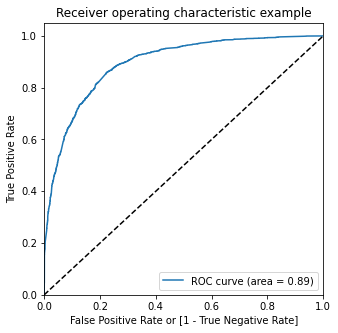

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Probability)

# **Optimal Cutoff Point**

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [125]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.683433,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.644110,113,1,1,1,1,1,1,1,1,0,0,0
2,1,0.719738,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.121012,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.017068,1109,0,1,0,0,0,0,0,0,0,0,0


### **Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.**

In [126]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.647785  0.971974  0.440902
0.2   0.2  0.764557  0.926483  0.661223
0.3   0.3  0.800633  0.874898  0.753240
0.4   0.4  0.813449  0.781478  0.833852
0.5   0.5  0.816456  0.714460  0.881545
0.6   0.6  0.808070  0.637287  0.917055
0.7   0.7  0.783228  0.522746  0.949456
0.8   0.8  0.763449  0.444354  0.967081
0.9   0.9  0.718196  0.296507  0.987299


### **Plot accuracy sensitivity and specificity for various probabilities.**

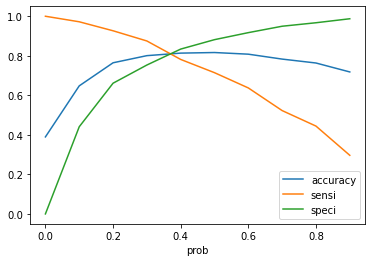

In [127]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### **From the curve above, 0.37 is the optimum point to take it as a cutoff probability.**

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.683433,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.644110,113,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.719738,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.121012,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.017068,1109,0,1,0,0,0,0,0,0,0,0,0,0


### **Calculate the lead score**

In [129]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Probability.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Probability,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.683433,2240,1,1,1,1,1,1,1,1,0,0,0,1,68
1,0,0.644110,113,1,1,1,1,1,1,1,1,0,0,0,1,64
2,1,0.719738,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.121012,5573,0,1,1,0,0,0,0,0,0,0,0,0,12
4,0,0.017068,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.043679,2282,0,1,0,0,0,0,0,0,0,0,0,0,4
6,1,0.894450,2976,1,1,1,1,1,1,1,1,1,1,0,1,89
7,0,0.467079,8431,0,1,1,1,1,1,0,0,0,0,0,1,47
8,1,0.698943,2770,1,1,1,1,1,1,1,1,0,0,0,1,70
9,1,0.995601,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


### **checking if 80% cases are correctly predicted based on the converted column and get the total of final predicted conversion / non conversion counts from the actual converted rates**

In [130]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1967
0     495
Name: final_predicted, dtype: int64

### **Precentage of final_predicted conversions**

In [131]:
1967/float(1967+495)

0.7989439480097482

### **Accuracy Score**

In [132]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8110759493670886

### **Confusion Matrix**

In [133]:
metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

array([[3159,  699],
       [ 495, 1967]], dtype=int64)

### **Classification Report**

In [134]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3858
           1       0.74      0.80      0.77      2462

    accuracy                           0.81      6320
   macro avg       0.80      0.81      0.80      6320
weighted avg       0.82      0.81      0.81      6320



### **Import precision recall curve**

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Probability)

### **Plot precision and recall curve**

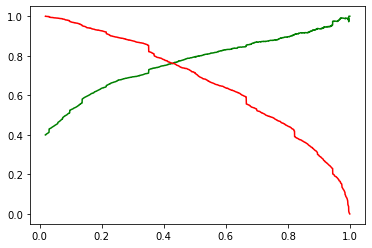

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# **Test Data Analysis**

In [138]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [139]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_NA,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,0,0,0,0,1,0,0,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [141]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2296    0.904528
8697    0.593393
7378    0.201095
8631    0.634726
4799    0.951083
4503    0.368775
7129    0.896538
1717    0.137135
8398    0.834731
5116    0.214839
dtype: float64

Fetching Y-Pred values

In [142]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2296,0.904528
8697,0.593393
7378,0.201095
8631,0.634726
4799,0.951083


In [143]:
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadId'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.904528
1,0,8697,0.593393
2,0,7378,0.201095
3,0,8631,0.634726
4,1,4799,0.951083


In [145]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [146]:
y_pred_final.head()

,Converted,LeadId,Converted_Probability
0,1,2296,0.904528
1,0,8697,0.593393
2,0,7378,0.201095
3,0,8631,0.634726
4,1,4799,0.951083


In [147]:
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Probability'], axis=1)

In [148]:
y_pred_final.head()

,LeadId,Converted,Converted_Probability
0,2296,1,0.904528
1,8697,0,0.593393
2,7378,0,0.201095
3,8631,0,0.634726
4,4799,1,0.951083


### **Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%**

In [149]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Probability,final_predicted
0,2296,1,0.904528,1
1,8697,0,0.593393,1
2,7378,0,0.201095,0
3,8631,0,0.634726,1
4,4799,1,0.951083,1


### **Calculate the lead score**

In [150]:
y_pred_final['lead_score'] = y_pred_final.Converted_Probability.map(lambda x: round(x*100))
y_pred_final.head(10)

,LeadId,Converted,Converted_Probability,final_predicted,lead_score
0,2296,1,0.904528,1,90
1,8697,0,0.593393,1,59
2,7378,0,0.201095,0,20
3,8631,0,0.634726,1,63
4,4799,1,0.951083,1,95
5,4503,0,0.368775,0,37
6,7129,0,0.896538,1,90
7,1717,0,0.137135,0,14
8,8398,0,0.834731,1,83
9,5116,1,0.214839,0,21


### **Checking if 80% cases are correctly predicted based on the converted column and get the total of final predicted conversion or non conversion counts from the actual converted rates**

In [151]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    803
0    212
Name: final_predicted, dtype: int64

### **Precentage of final_predicted conversions on test data**

In [152]:
803/float(803+212)

0.7911330049261084

### **Confusion Matrix**

In [153]:
metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)

array([[1396,  298],
       [ 212,  803]], dtype=int64)

### **Accuracy Score**

In [154]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8117386489479512

### **Classification Report**

In [155]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1694
           1       0.73      0.79      0.76      1015

    accuracy                           0.81      2709
   macro avg       0.80      0.81      0.80      2709
weighted avg       0.82      0.81      0.81      2709



### **Plot Precision Recall Curve**

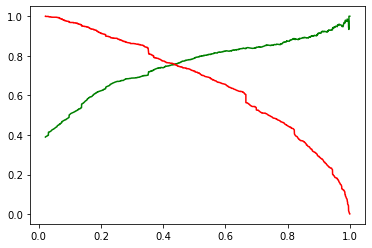

In [156]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Probability)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **Conclusion :**
    
- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal and cut off based on Sensitivity and Specificity for calculating the final prediction.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to the respective values calculated using trained set.
- Hence overall this model seems to be good.   